In [92]:
import pandas as pd
import numpy as np

real_bulk_path = './example_data/bulk_data.txt'
real_bulk = pd.read_csv(real_bulk_path, delimiter=',', index_col=0)
real_bulk = real_bulk.T

fake_bulk_path = './example_data/TAPE_fake_bulk.csv'
fake_bulk = pd.read_csv(fake_bulk_path, index_col=0)

In [111]:
sig = pd.read_csv('./example_data/TAPE_sig.csv', index_col=0)
fra = pd.read_csv('./example_data/TAPE_fra.csv', index_col=0)

In [114]:
## actual fraction of input single cell data
# Sampled cell type distribution:
# T-cells              3519
# Cancer Epithelial    2447
# Myeloid               966
# Endothelial           760
# CAFs                  656
# PVL                   541
# Normal Epithelial     435
# Plasmablasts          352
# B-cells               320

In [113]:
fra

,B-cells,CAFs,Cancer Epithelial,Endothelial,Myeloid,Normal Epithelial,PVL,Plasmablasts,T-cells
TCGA-A1-A0SD-01,0.000000,0.352485,0.464144,0.028364,0.060248,0.052626,0.0,0.0,0.042133
TCGA-A1-A0SE-01,0.000000,0.347622,0.464249,0.028750,0.059705,0.057122,0.0,0.0,0.042553
TCGA-A1-A0SH-01,0.000000,0.354286,0.463414,0.027748,0.060284,0.052501,0.0,0.0,0.041766
TCGA-A1-A0SJ-01,0.000000,0.347184,0.468536,0.027953,0.059734,0.052983,0.0,0.0,0.043610
TCGA-A1-A0SK-01,0.000000,0.348173,0.484626,0.022681,0.055748,0.047163,0.0,0.0,0.041609
...,...,...,...,...,...,...,...,...,...
TCGA-E2-A1B4-01,0.000000,0.347366,0.470441,0.026776,0.058711,0.055181,0.0,0.0,0.041524
TCGA-E2-A1B5-01,0.000000,0.340846,0.466080,0.027351,0.063863,0.052124,0.0,0.0,0.049737
TCGA-E2-A1B6-01,0.000579,0.342433,0.458678,0.030834,0.064162,0.052458,0.0,0.0,0.050857
TCGA-E2-A1BC-01,0.000000,0.351636,0.465624,0.028420,0.059798,0.051940,0.0,0.0,0.042582


In [95]:
common_columns = (real_bulk.columns).intersection(fake_bulk.columns)
real_bulk = real_bulk[common_columns]
fake_bulk = fake_bulk[common_columns]
real_bulk = real_bulk.loc[:, ~real_bulk.columns.duplicated()]

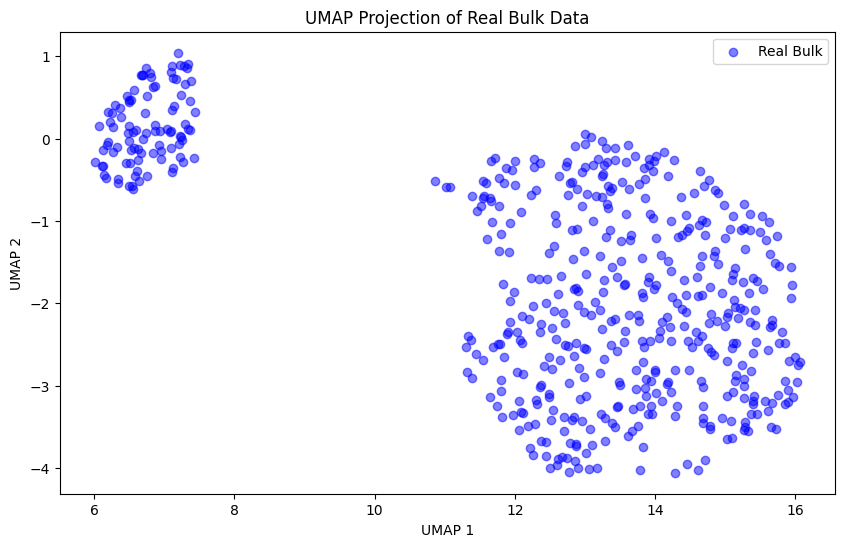

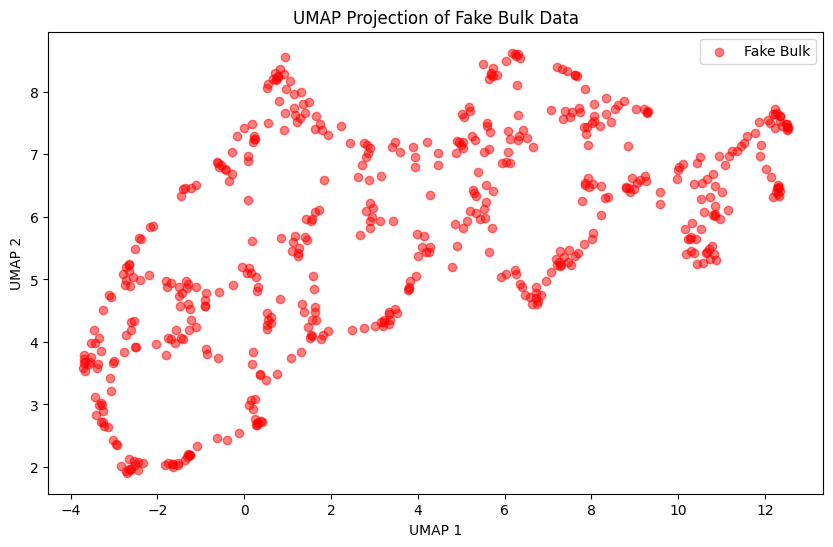

In [101]:
import umap
import matplotlib.pyplot as plt

# 使用 UMAP 对 real_bulk 进行降维
reducer_real = umap.UMAP()
embedding_real = reducer_real.fit_transform(real_bulk)

# 使用 UMAP 对 fake_bulk 进行降维
reducer_fake = umap.UMAP()
embedding_fake = reducer_fake.fit_transform(fake_bulk)

# 绘制 real_bulk 的 UMAP 降维结果
plt.figure(figsize=(10, 6))
plt.scatter(embedding_real[:, 0], embedding_real[:, 1], c='blue', label='Real Bulk', alpha=0.5)
plt.title('UMAP Projection of Real Bulk Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

# 绘制 fake_bulk 的 UMAP 降维结果
plt.figure(figsize=(10, 6))
plt.scatter(embedding_fake[:, 0], embedding_fake[:, 1], c='red', label='Fake Bulk', alpha=0.5)
plt.title('UMAP Projection of Fake Bulk Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()


c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


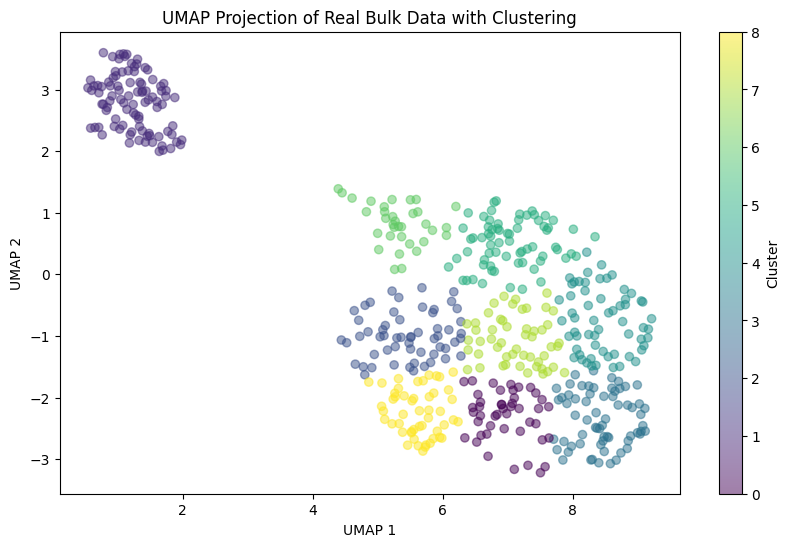

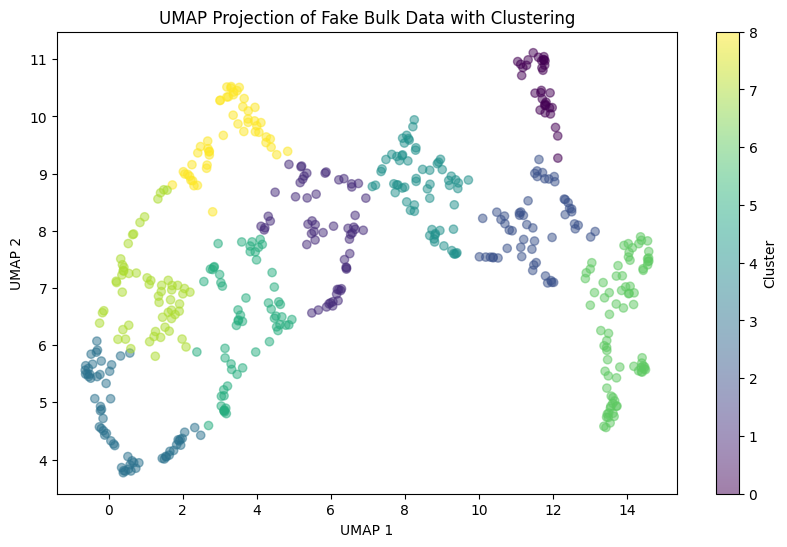

In [103]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 假设你已经有了 real_bulk 和 fake_bulk 数据集

# 使用 UMAP 对 real_bulk 进行降维
reducer_real = umap.UMAP()
embedding_real = reducer_real.fit_transform(real_bulk)

# 使用 UMAP 对 fake_bulk 进行降维
reducer_fake = umap.UMAP()
embedding_fake = reducer_fake.fit_transform(fake_bulk)

# 使用 KMeans 聚类算法对 real_bulk 进行聚类
kmeans_real = KMeans(n_clusters=9, random_state=42)
clusters_real = kmeans_real.fit_predict(embedding_real)

# 使用 KMeans 聚类算法对 fake_bulk 进行聚类
kmeans_fake = KMeans(n_clusters=9, random_state=42)
clusters_fake = kmeans_fake.fit_predict(embedding_fake)

# 绘制 real_bulk 的 UMAP 降维结果并用聚类结果着色
plt.figure(figsize=(10, 6))
plt.scatter(embedding_real[:, 0], embedding_real[:, 1], c=clusters_real, cmap='viridis', alpha=0.5)
plt.title('UMAP Projection of Real Bulk Data with Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()

# 绘制 fake_bulk 的 UMAP 降维结果并用聚类结果着色
plt.figure(figsize=(10, 6))
plt.scatter(embedding_fake[:, 0], embedding_fake[:, 1], c=clusters_fake, cmap='viridis', alpha=0.5)
plt.title('UMAP Projection of Fake Bulk Data with Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()


In [106]:
def ccc(y_pred, y_true, mode='all'):
    # pred: shape{n sample, m cell}
    if mode == 'all':
        y_pred = y_pred.reshape(-1, 1)
        y_true = y_true.reshape(-1, 1)
    elif mode == 'avg':
        pass
    ccc_value = 0
    for i in range(y_pred.shape[1]):
        r = np.corrcoef(y_pred[:, i], y_true[:, i])[0, 1]
        # Mean
        mean_true = np.mean(y_true[:, i])
        mean_pred = np.mean(y_pred[:, i])
        # Variance
        var_true = np.var(y_true[:, i])
        var_pred = np.var(y_pred[:, i])
        # Standard deviation
        sd_true = np.std(y_true[:, i])
        sd_pred = np.std(y_pred[:, i])
        # Calculate CCC
        numerator = 2 * r * sd_true * sd_pred
        denominator = var_true + var_pred + (mean_true - mean_pred) ** 2
        ccc = numerator / denominator
        ccc_value += ccc
    return ccc_value / y_pred.shape[1]

In [110]:
print('ccc between real_bulk and generated_bulk: ',ccc(fake_bulk.values,real_bulk.values))

ccc between real_bulk and generated_bulk:  0.000567298127835894
